## Notebook for Cloud Walk Risk Analysis Case - Candidate Fernando Cirone 

## Questions

### 1) Analyze the data provided and present your conclusions. What suspicious behaviors did you find? What led you to this conclusion? What actions would you take?

Answer:

### 2) In addition to the spreadsheet data, what other data would you consider to find patterns of possible fraudulent behavior?

Answer:
- If the purchase was made by CPF of PJ - usually companies (PJ) makes more purcheses in 1 month than (PF);
- Geolocation of the transaction - important to understand the pattern of purchase . If it was made in a certain location that the user don't usually it is located, it tends to be fraud ;
- Credit Score of the buyer: you can rely more on users with higher credit score ;
- Aging of the ID: you can rely more in older users;

### 3) Considering your conclusions, what would you further suggest in order to prevent frauds and/or chargebacks?

Answer:

### 4) Create an anti-fraud solution.

Answer:

Some tips: <br>
User_id: id of the cardholders; <br>
Device_id: device used by the cardholder; <br>
Has_cbk: transaction received a fraud chargeback or not. <br>
All the transactions occurred in a card not present environment. <br>
You can use any programming language that you want.

## 0. Import Python

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import csv and Features information <br>
Source: https://gist.github.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97#file-transactional-sample-csv

In [4]:
df = pd.read_csv('data/transactional-sample.csv', delimiter=',')
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True


## Features Info: <br>
    - transaction_id: identification of the transaction;
    - merchant_id: identification of the company involved on the sale;
    - user_id: identification of the user (cardholder); 
    - card_number: identification of the card in the transaction; 
    - transaction_date: data; 
    - transaction_amount: amount;
    - device_id: identification of the device;
    - has_cbk: transaction received a fraud chargeback or not.

Extra: 
### what is chargeback: <br>
Chargebacks are a type of transaction reversal that occurs when a customer disputes a charge with their bank or credit card company. Chargebacks can occur for a variety of reasons, such as fraud, dissatisfaction with a product or service, or errors made by the business. When a chargeback occurs, the customer’s bank or credit card company refunds the disputed amount to the customer and deducts the amount from the business’s account.

For businesses, chargebacks can result in financial losses, damage to their reputation, higher fees from payment processors, and even losing the ability to accept credit card payments. To compound these issues, fraudulent actors sometimes use chargebacks as a tool to steal from businesses.

### what is FRAUD chargeback: <br>

Chargeback fraud occurs when a customer intentionally disputes a charge in order to receive a refund, while keeping the product or service. The customer may claim they did not receive the product, that the product was defective, or that the transaction was unauthorized. There are several types of chargeback fraud, including:


Friendly fraud <br>
Friendly fraud occurs when a cardholder makes a legitimate purchase but later disputes the charge, claiming they did not authorize it or that the goods or services were not as described. Sometimes this happens when the cardholder forgets that they made the charge, doesn’t recognize it on the billing statement, and assumes it was fraud. In some cases of friendly fraud, the cardholder may even receive the merchandise and then file a chargeback, claiming that they never received it.

Return fraud <br>
Return fraud happens when an individual returns an item to a retailer, claiming that the product is faulty, defective, or otherwise not satisfactory—despite the fact that the product is in good condition or has been tampered with (or used). This often accompanies a chargeback request, particularly if the retailer’s return policy is unclear.

Digital-goods chargebacks <br>
Digital-goods fraud occurs when a customer disputes a charge for a digital product, such as a software license or online course, after accessing and using the product. This can be difficult for businesses to prevent, since the customer may have already downloaded the product—but the business cannot know this for certain.

Subscription fraud
Subscription fraud occurs when a customer disputes a recurring charge for a subscription service, such as a streaming service, after receiving several months of service. The customer may claim they did not authorize the recurring charge or that they canceled the subscription but were still charged.


Source: https://stripe.com/br/resources/more/chargeback-fraud-101

## 2. Quick look at the dataset (without edditing)

In [6]:
df.shape

(3199, 8)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


In [7]:
df.duplicated().value_counts()

False    3199
Name: count, dtype: int64

In [8]:
df.describe()

,transaction_id,merchant_id,user_id,transaction_amount,device_id
count,3.199000e+03,3199.000000,3199.000000,3199.000000,2369.000000
mean,2.132200e+07,48771.128790,50891.077212,767.812904,493924.859856
std,9.236161e+02,29100.360839,29515.282827,889.095904,283785.584545
min,2.132040e+07,16.000000,6.000000,1.220000,2.000000
25%,2.132120e+07,23426.000000,24267.500000,205.235000,259344.000000
50%,2.132200e+07,48752.000000,52307.000000,415.940000,495443.000000
75%,2.132280e+07,73915.000000,76837.000000,981.680000,733243.000000
max,2.132360e+07,99799.000000,99974.000000,4097.210000,999843.000000


In [22]:
df.isnull().value_counts()

transaction_id  merchant_id  user_id  card_number  transaction_date  transaction_amount  device_id  has_cbk
False           False        False    False        False             False               False      False      2369
                                                                                         True       False       830
Name: count, dtype: int64

In [31]:
df.isna().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [23]:
df["device_id"].isnull().value_counts()

device_id
False    2369
True      830
Name: count, dtype: int64

In [14]:
df["device_id"].isnull().value_counts() / df["device_id"].isnull().value_counts().sum()

device_id
False    0.740544
True     0.259456
Name: count, dtype: float64

☝️ 26% of device_id feature it is null

In [72]:
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,time_diff
11,21320409,32954,6,428267******9019,2019-12-01 20:44:48.109011,443.90,757451.0,False,2019,12,1,20,44,NaN
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False,2019,11,1,1,29,NaN


Overtall numbers
Interval of time ? 30 days; <br>
How many Unique Transactions ? <br>
How many Unique Users Id? <br>
How many Devices ? <br>
How many Unique Merchants ? <br>
How many Unique Credict Cards ? <br>
Min Transaction Ammount ? <br>
Max transaction Ammount ? <br>

In [ ]:
User per smthing
User per credidt card ?
User per device ?
User per transaction ?

In [ ]:
Transaction
Usuario com mais transação ?
Cartão com mais transação ?

In [ ]:
Outliers
Usuário com mais has_cbk ?
Cartõe com mais has_cbk ?

In [71]:
df["transaction_date"].max() - df["transaction_date"].min()

Timedelta('30 days 21:49:17.001534')

In [86]:
print(f'transaction_id: {df["transaction_id"].nunique()}')
print(f'user_id: {df["user_id"].nunique()}')
print(f'device_id: {df["device_id"].nunique()}')
print(f'merchant_id: {df["merchant_id"].nunique()}')
print(f'card_number: {df["card_number"].nunique()}')

transaction_id: 3199
user_id: 2704
device_id: 1996
merchant_id: 1756
card_number: 2925


In [84]:
df["transaction_amount"].max()

transaction_amount    4097.21
dtype: float64

In [85]:
df["transaction_amount"].min()

np.float64(1.22)

## 3. Edditing the dataset

Edditing actions, for now: <br>
    - Clean the transaction_date

In [37]:
df[["transaction_date"]].head(2)

,transaction_date
0,2019-12-01T23:16:32.812632
1,2019-12-01T22:45:37.873639


In [41]:
df["transaction_date"].dtype

dtype('O')

In [42]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [43]:
df["transaction_date"].dtype

dtype('<M8[ns]')

In [44]:
df[["transaction_date"]].head(2)

,transaction_date
0,2019-12-01 23:16:32.812632
1,2019-12-01 22:45:37.873639


In [66]:
df["transaction_date"].min()

Timestamp('2019-11-01 01:27:15.811098')

In [67]:
df["transaction_date"].max()

Timestamp('2019-12-01 23:16:32.812632')

### The transactions were made in 30 days !

#### Since the date and time it is important to understand fraud, I will separate all the infos of the date

In [45]:
df["transaction_year"] = df["transaction_date"].dt.year
df["transaction_month"] = df["transaction_date"].dt.month
df["transaction_day"] = df["transaction_date"].dt.day
df["transaction_hour"] = df["transaction_date"].dt.hour
df["transaction_minute"] = df["transaction_date"].dt.minute
#df["transaction_weekday"] = df["transaction_date"].dt.weekday  # 0 para segunda-feira, 6 para domingo

In [46]:
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False,2019,12,1,23,16
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,2019,12,1,22,45


### First hypotesis: fraudulent transactions in a small period of time

To understand that we need to count the delta time of those transacitons

In [48]:
#Sort the Dataframe to understand the time diff of every transaction (after a groupby)
df = df.sort_values(["user_id", "transaction_date"])
df.head(4)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute
11,21320409,32954,6,428267******9019,2019-12-01 20:44:48.109011,443.90,757451.0,False,2019,12,1,20,44
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False,2019,11,1,1,29
3198,21323596,17348,8,650487******9884,2019-11-01 01:27:15.811098,2416.70,NaN,False,2019,11,1,1,27
3189,21323587,82477,19,525496******3638,2019-11-01 17:52:57.071163,165.14,NaN,False,2019,11,1,17,52


In [50]:
df["time_diff"] = df.groupby("user_id")["transaction_date"].diff().dt.total_seconds()
df.head(4)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,time_diff
11,21320409,32954,6,428267******9019,2019-12-01 20:44:48.109011,443.90,757451.0,False,2019,12,1,20,44,NaN
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False,2019,11,1,1,29,NaN
3198,21323596,17348,8,650487******9884,2019-11-01 01:27:15.811098,2416.70,NaN,False,2019,11,1,1,27,NaN
3189,21323587,82477,19,525496******3638,2019-11-01 17:52:57.071163,165.14,NaN,False,2019,11,1,17,52,NaN


In [51]:
df["time_diff"].unique()

array([           nan, 3.31732420e+01, 1.63331928e+05, 5.70370995e+05,
       2.30735171e+05, 1.08439832e+02, 1.57483308e+05, 4.30484820e+05,
       3.78562176e+02, 3.28206297e+03, 3.40071236e+03, 1.73896241e+03,
       4.21551408e+02, 1.18095149e+04, 5.84966417e+02, 5.89981192e+05,
       2.45960702e+04, 1.66752935e+02, 8.81248467e+04, 7.98711296e+02,
       3.18695059e+02, 2.07875193e+02, 5.75460725e+03, 2.94479007e+03,
       8.32611146e+04, 7.50433663e+04, 8.07603029e+02, 1.09307994e+05,
       2.80284117e+04, 3.50198319e+03, 7.55154626e+02, 3.20031874e+05,
       1.93606064e+05, 7.75929013e+04, 9.63143984e+04, 6.54250353e+04,
       5.59374114e+03, 5.06618135e+02, 3.21206363e+04, 6.57984450e+04,
       2.18002028e+03, 8.00348919e+04, 9.06598191e+04, 6.98463938e+05,
       4.65271990e+04, 9.24114391e+03, 6.40189949e+04, 2.39649975e+02,
       9.70680728e+02, 9.91547911e+04, 3.38713009e+02, 5.86611539e+03,
       1.07008123e+05, 4.44201426e+04, 3.65485805e+02, 6.76545880e+01,
      

In [64]:
df["user_id"].nunique()

2704

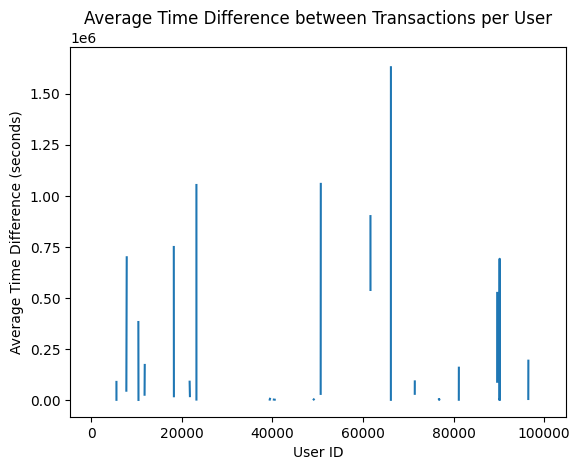

In [65]:
# Calcule a média dos intervalos de tempo por usuário
mean_time_diff_per_user = df.groupby("user_id")["time_diff"].mean()

# Plote o gráfico de forma resumida
plt.plot(mean_time_diff_per_user)
plt.xlabel("User ID")
plt.ylabel("Average Time Difference (seconds)")
plt.title("Average Time Difference between Transactions per User")
plt.show()


Possible Rules to investigate suspisius transactions (1 month): <br>
    - ID x Device: <br>
        - 1 ID 1 Device - baixo risco; <br>
        - 1 ID 2 Device - medio risco; <br>
        - 1 ID 3 Device - alto risco; <br>
    - Credit card used for: <br>
        - <br>
        - <br>
        - <br>
    - User with charge back before: <br>
        - Alto risco <br>
    -  <br>
    - Tempo de transação: <br>
        - > 120 - baixo risco <br>
        - 60 < x < 120 - medio risco <br>
        - <60seg - alto risco; <br>

In [ ]:
- Marcar possíveis transações fraudulentas para melhor ;
- Criar um modelo de classificação para prever possiveis transações fraudulentas: Alto risco / medio risco / baixo risco;
-
-

In [ ]:
- classificar os usuarios mais fraudulentos - de acordo com isso investigar (double check)

In [69]:
df

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,time_diff
11,21320409,32954,6,428267******9019,2019-12-01 20:44:48.109011,443.90,757451.0,False,2019,12,1,20,44,NaN
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False,2019,11,1,1,29,NaN
3198,21323596,17348,8,650487******9884,2019-11-01 01:27:15.811098,2416.70,NaN,False,2019,11,1,1,27,NaN
3189,21323587,82477,19,525496******3638,2019-11-01 17:52:57.071163,165.14,NaN,False,2019,11,1,17,52,NaN
390,21320788,64192,132,485464******8785,2019-11-30 10:36:29.122871,714.56,568889.0,False,2019,11,30,10,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,21321873,15718,99863,516292******4125,2019-11-23 18:36:15.424406,466.64,223648.0,False,2019,11,23,18,36,NaN
893,21321291,29842,99875,544731******2488,2019-11-28 18:26:43.061020,191.08,335107.0,False,2019,11,28,18,26,NaN
1541,21321939,91972,99876,511588******6999,2019-11-23 16:13:33.495480,1421.20,114015.0,True,2019,11,23,16,13,NaN
1255,21321653,38964,99948,428267******3039,2019-11-25 19:29:58.020040,184.61,222976.0,False,2019,11,25,19,29,NaN
